In [35]:
# Creating data set

# A
a =[0, 0, 1, 1, 0, 0,
   0, 1, 0, 0, 1, 0,
   1, 1, 1, 1, 1, 1,
   1, 0, 0, 0, 0, 1,
   1, 0, 0, 0, 0, 1]
# B
b =[0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 1, 0]
# C
c =[0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 1, 1, 1, 0]

# Creating labels
y =[[1, 0, 0],
   [0, 1, 0],
   [0, 0, 1]]

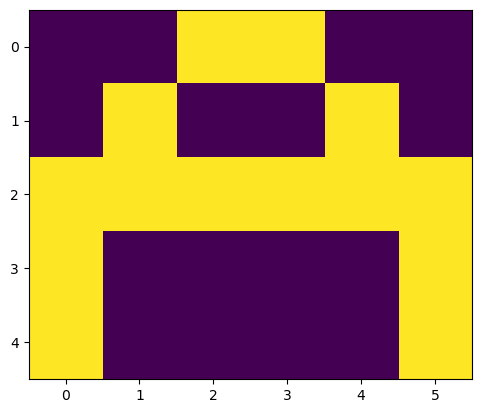

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# visualizing the data, plotting A.
plt.imshow(np.array(a).reshape(5, 6))
plt.show()

In [39]:
# converting data and labels into numpy array
x =[np.array(a).reshape(1, 30), np.array(b).reshape(1, 30), 
                                np.array(c).reshape(1, 30)]
y = np.array(y)
# Printing data and labels
print(x, "\n\n", y)

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


In [41]:
# activation function
def sigmoid(x):
	return(1/(1 + np.exp(-x)))

# Creating the Feed forward neural network
def f_forward(x, w1, w2):
	# hidden
	z1 = x.dot(w1)    # input from layer 1 
	a1 = sigmoid(z1)  # out put of layer 2 
	z2 = a1.dot(w2)   # input of out layer
	a2 = sigmoid(z2)  # output of out layer
	return(a2)

# initializing the weights randomly
def generate_wt(x, y):
	li =[]
	for i in range(x * y):
		li.append(np.random.randn())
	return(np.array(li).reshape(x, y))
	
# for loss we will be using mean square error(MSE)
def loss(out, Y):
	s =(np.square(out-Y))
	s = np.sum(s)/len(y)
	return(s)

# Back propagation of error 
def back_prop(x, y, w1, w2, alpha):
	
	# hidden layer
	z1 = x.dot(w1)
	a1 = sigmoid(z1) 
	z2 = a1.dot(w2)
	a2 = sigmoid(z2)
	
	# error in output layer
	d2 =(a2-y)
	d1 = np.multiply((w2.dot((d2.transpose()))).transpose(), 
								(np.multiply(a1, 1-a1)))
	# Gradient for w1 and w2
	w1_adj = x.transpose().dot(d1)
	w2_adj = a1.transpose().dot(d2)
	
	# Updating parameters
	w1 = w1-(alpha*(w1_adj))
	w2 = w2-(alpha*(w2_adj))
	
	return(w1, w2)

In [43]:
w1 = generate_wt(30, 5)
w2 = generate_wt(5, 3)

print(w1, "\n\n", w2)

[[ 0.38188051 -1.34497692 -1.12143995 -0.66837775 -0.08134217]
 [ 0.8565131   0.45836153 -0.08923384 -0.6612301   1.27286165]
 [ 0.06879872  1.44942965  0.56574036 -1.0289778  -0.13870308]
 [ 1.27618129  0.49537887 -0.61720719 -0.07651444 -0.41669446]
 [-0.17032058  0.86256759  1.63625126  2.47515809  0.08755941]
 [ 0.62024692  0.72786955  0.08814189 -1.61117577  1.53527859]
 [ 0.23605893  0.89849276 -0.79283929  1.98467208 -0.79160714]
 [ 1.4375205  -0.63259662  0.20586745  1.10679526 -1.03156942]
 [ 0.01285836  0.63819648 -0.86046593  0.72946717  0.53757388]
 [-0.5614602   1.21562121 -0.09204023 -0.68758246 -0.27575416]
 [-0.35215345 -0.54405322  0.06953114  0.03517779  0.36282185]
 [-0.27592032 -0.18892595 -0.27146091  0.02661047  0.29376818]
 [-0.87336672  0.84924134 -2.06332751  1.17705103 -0.01242425]
 [ 0.31568559  0.4133931  -0.23717768  1.31129268  0.29013689]
 [-0.74721041  0.50411916 -1.13157961 -0.35787569  1.35559746]
 [-0.41531678 -0.79270241 -0.00879913  1.54236     0.37

In [45]:
def train(x, Y, w1, w2, alpha = 0.01, epoch = 10):
	acc =[]
	losss =[]
	for j in range(epoch):
		l =[]
		for i in range(len(x)):
			out = f_forward(x[i], w1, w2)
			l.append((loss(out, Y[i])))
			w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
		print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100) 
		acc.append((1-(sum(l)/len(x)))*100)
		losss.append(sum(l)/len(x))
	return(acc, losss, w1, w2)

acc, losss, w1, w2 = train(x, y, w1, w2, 0.1, 100)

epochs: 1 ======== acc: 58.7056064127184
epochs: 2 ======== acc: 64.0561674984554
epochs: 3 ======== acc: 68.49637628804463
epochs: 4 ======== acc: 71.7816489454155
epochs: 5 ======== acc: 74.1420057082537
epochs: 6 ======== acc: 75.88162582604477
epochs: 7 ======== acc: 77.22711136551044
epochs: 8 ======== acc: 78.321307460932
epochs: 9 ======== acc: 79.25039156586753
epochs: 10 ======== acc: 80.06683679900993
epochs: 11 ======== acc: 80.80353070551328
epochs: 12 ======== acc: 81.48168594065093
epochs: 13 ======== acc: 82.11524612040897
epochs: 14 ======== acc: 82.71344453221747
epochs: 15 ======== acc: 83.28238567164095
epochs: 16 ======== acc: 83.82608125801177
epochs: 17 ======== acc: 84.34715594463069
epochs: 18 ======== acc: 84.84733636320374
epochs: 19 ======== acc: 85.32778954452147
epochs: 20 ======== acc: 85.78935333595929
epochs: 21 ======== acc: 86.23268872692576
epochs: 22 ======== acc: 86.6583761652847
epochs: 23 ======== acc: 87.06697251386608
epochs: 24 ======== acc: 87

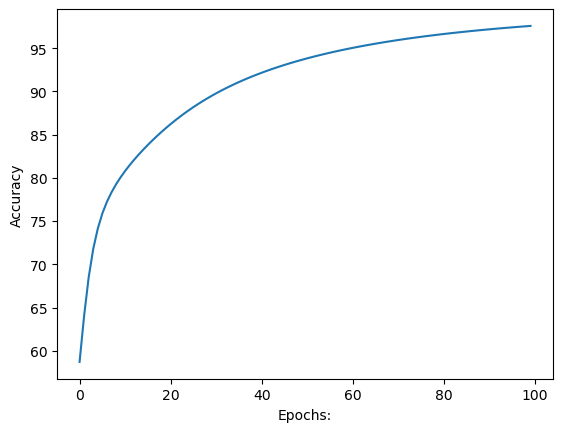

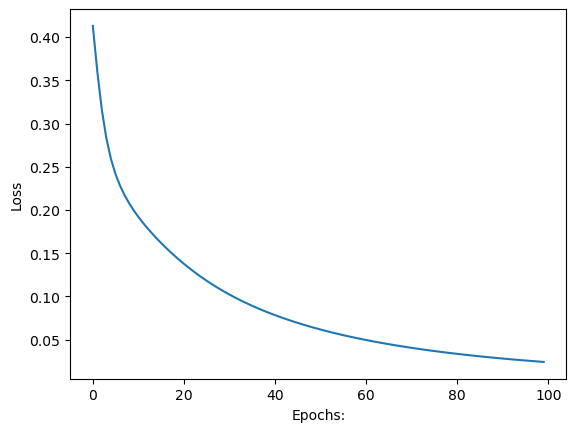

In [47]:
import matplotlib.pyplot as plt1

# plotting accuracy
plt1.plot(acc)
plt1.ylabel('Accuracy')
plt1.xlabel("Epochs:")
plt1.show()

# plotting Loss
plt1.plot(losss)
plt1.ylabel('Loss')
plt1.xlabel("Epochs:")
plt1.show()

Image is of letter C.


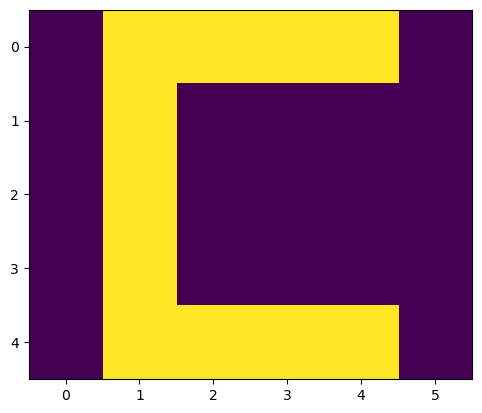

In [49]:
def predict(x, w1, w2):
	Out = f_forward(x, w1, w2)
	maxm = 0
	k = 0
	for i in range(len(Out[0])):
		if(maxm<Out[0][i]):
			maxm = Out[0][i]
			k = i
	if(k == 0):
		print("Image is of letter A.")
	elif(k == 1):
		print("Image is of letter B.")
	else:
		print("Image is of letter C.")
	plt.imshow(x.reshape(5, 6))
	plt.show() 
# Example: Predicting for letter 'B'	
predict(x[2], w1, w2)